# HSE 2022: Mathematical Methods for Data Analysis

## Homework 1

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task. 
Loops are only allowed in part 1 (Tasks 1 - 4). 
* Some tasks contain tests. They only test you solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task. 

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Python (2 points) 

**Task 1** (0.5 points)<br/> 
Enter nonzero numbers `a`,  `r` and `N`. Find the first `N` members of geometric progression with the first member `a` and factor `r`, without using formula for the product.

In [7]:
def find_product(a,r,N):
     return [np.round(np.exp(i * np.log(r)) * a) for i in range(0, N)]
    
a = 2
r = 3
N = 3
print(find_product(a,r,N))

[2.0, 6.0, 18.0]


**Task 2** (0.5 points) <br/> 
Enter an integer number `N`. Check if it is a palindrome number. It means that it can be read equally from left to right and from right to back. 

In [21]:
def check_palindrome(N):
    rev_N = int(''.join(reversed(list(str(N)))))
        
    ## Your code here''
    return N == rev_N

for N in [3, 81, 111, 113, 810, 2022, 4774, 51315, 611816]:
    print(N, check_palindrome(N))

3 True
81 False
111 True
113 False
810 False
2022 False
4774 True
51315 True
611816 False


**Task 3** (0.5 points) <br/> 
Find the first `N` palindrome numbers starting from 1000 (you may use the function from the precious task).

In [22]:
def find_palindromes(N):
    n = 1000
    palindromes = []
    while N:
        if check_palindrome(n):
            palindromes.append(n)
            N -= 1
        n += 1

    return palindromes

print(find_palindromes(5))
print(find_palindromes(10))
print(find_palindromes(20))

[1001, 1111, 1221, 1331, 1441]
[1001, 1111, 1221, 1331, 1441, 1551, 1661, 1771, 1881, 1991]
[1001, 1111, 1221, 1331, 1441, 1551, 1661, 1771, 1881, 1991, 2002, 2112, 2222, 2332, 2442, 2552, 2662, 2772, 2882, 2992]


**Task 4** (0.5 points) <br/> 
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` and other functions, find the minimum number.

In [23]:
from random import randint
def find_min(a, b, c):
    if a < b:
        if a < c:
            min_ = a
        else:
            min_ = c
    else:
        if b < c:
            min_ = b
        else:
            min_ = c
            
    return min_

for i in range(10):
    
    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)
    
    print(a, b, c, '\tMinimum:', find_min(a, b, c))

85 -37 -60 	Minimum: -60
-58 -45 -3 	Minimum: -58
-97 75 24 	Minimum: -97
-13 20 5 	Minimum: -13
-99 43 93 	Minimum: -99
-59 -43 -39 	Minimum: -59
10 97 -50 	Minimum: -50
-27 -97 -66 	Minimum: -97
-1 60 -100 	Minimum: -100
29 0 -43 	Minimum: -43


# 2. Numpy (4 points)

**Task 1** (0.5 points) <br/>
Create a random array (`np.random.rand()`) with length of 17 and with sum of its elements equals to 6.

In [48]:
my_array = np.random.rand(17)
my_array /= sum(my_array)/6

print(f'Length: {len(my_array)}')
print(f'Sum of elements: {np.sum(my_array)}')

Length: 17
Sum of elements: 6.0


**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length. 

Calculate the following distances between the arrays **without using special funcrion. You may only use basic numpy operations (`np.linalg.*` and other high-level ones are prohibited).**:

* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Chebyshev Distance
$$ d(a, b) = \underset{i}{max} |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2} $$


In [84]:
def calculate_manhattan(a, b):

    distance = sum(np.abs(a - b))
    
    return distance

def euc_norm(a):
    
    return np.sqrt(np.sum(np.power(a, 2)))

def calculate_euclidean(a, b):    

    distance = euc_norm(a - b)
    
    return distance

def calculate_chebyshev(a, b):    
    
    distance = np.max(a - b)
    
    return distance

def calculate_cosine(a, b):
    
    distance = 1 - (np.dot(a, b)) / (euc_norm(a) * euc_norm(b))

    return distance

In [85]:
l = 10000
a = np.random.rand(l)
b = np.random.rand(l)
print(f'Manhattan distance: {calculate_manhattan(a, b)}')
print(f'Euclidean distance: {calculate_euclidean(a, b)}')
print(f'Chebyshev distance: {calculate_chebyshev(a, b)}')
print(f'Cosine distance: {calculate_cosine(a, b)}')

Manhattan distance: 3341.9055578306475
Euclidean distance: 40.900381311715996
Chebyshev distance: 0.9913923000741631
Cosine distance: 0.25241322680447464


**Task 3** (0.5 points) <br/>
Create a random array (`np.random.randint()`) with length of 76. Transform the array so that 
* Maximum element(s) value is -1
* Minimum element(s) value is -4
* Other values are in interval (-4; -1) with keeping the order

In [207]:
def transform(array, low_b, up_b):
    
    a_max = np.max(array)
    a_min = np.min(array)
    
    transformed_array = up_b + (array - np.min(array)) / (np.max(array) - np.min(array)) * (low_b - up_b)
    
    return transformed_array

In [211]:
my_array = np.random.rand(10)
my_array = transform(my_array, -4, -1)
print(f'Min: {np.min(my_array)}')
print(f'Max: {np.max(my_array)}')
print('Array:')
print(my_array)

Min: -4.0
Max: -1.0
Array:
[-2.21490444 -3.75302565 -1.40740992 -1.2283404  -4.         -3.76267626
 -1.         -3.78636069 -3.14671468 -2.9597512 ]


**Task 4** (0.5 points) <br/>
Create an array with shape of $8 \times 5$ with integers from [-7, 43]. Print a column that contains the maximum element of the array.

In [239]:
my_array = transform(np.random.rand(8, 5), -7, 43)
selected_column = my_array[:, np.argmax(np.max(my_array, axis=0))]
print('Shape: ', my_array.shape)
print('Array:')
print(my_array)
print(f'Selected column: {selected_column}')

Shape:  (8, 5)
Array:
[[12.11126241  1.94471906 18.5130159  -7.         39.52889251]
 [-2.01972536  3.64678539 19.30910193 -0.97537433  6.27814402]
 [28.26874502 31.5306732  21.43756297 43.         40.22620117]
 [23.15362767 29.08714633 38.91870571 37.20296805 40.28390302]
 [19.13076402 33.50350776 21.72942988 19.86591921 20.40682767]
 [18.73424507  8.70968046 -0.16922678 22.39365371 40.61604109]
 [ 9.66429421  6.39853165 29.55320303 27.25750009  0.17790562]
 [-4.56570692  8.47679183  7.36589894 33.52810751 17.78890666]]
Selected column: [-7.         -0.97537433 43.         37.20296805 19.86591921 22.39365371
 27.25750009 33.52810751]


**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with median.

In [283]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print('Array:')
print(arr)

Array:
[0.4580367  0.82085215 0.61491772        nan 0.91921657        nan
 0.21007638 0.80832436        nan        nan]


In [284]:
def replace_missing(arr):
    array_without_missing = np.copy(arr)
    
    inds = np.where(np.isnan(array_without_missing))
    array_without_missing[inds] = np.nanmedian(array_without_missing)
    
    return array_without_missing

In [285]:
arr = replace_missing(arr)
print('Array with no missing values:')
print(arr)


Array with no missing values:
[0.4580367  0.82085215 0.61491772 0.71162104 0.91921657 0.71162104
 0.21007638 0.80832436 0.71162104 0.71162104]


**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the mean for all 3 channels (a vector of shape 3).

In [295]:
def mean_channel(X):
    mean_vector = np.mean(X, axis=(0,1))
    return mean_vector

In [296]:
n = 19
m = 23
X =  np.random.randint(-11, 8, size=(n, m, 3))
mean_channel(X)

array([-1.92448513, -1.79176201, -1.82837529])

### **Task 7** (1 points) <br/>
Create a function which takes a 3D matrix ```X``` as an input and returns all its unique vertical (first axis) layers.

Sample input:

     ([[[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]
        [4, 5, 6]],

       [[7, 8, 9],
        [7, 8, 9]
        [7, 8, 9]]])
        
Sample output:

     ([[[1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]],

       [[7, 8, 9],
        [7, 8, 9]]])

In [341]:
def get_unique(X):
    X_unique = np.unique(X, axis=1)
    return X_unique

In [384]:
X =  np.random.randint(4, 6, size=(n, 3, 3))

print('Matrix:')
print(X)
print('Unique rows:')
get_unique(X)

Matrix:
[[[5 5 5]
  [4 5 5]
  [5 5 4]]

 [[5 4 4]
  [4 5 5]
  [5 5 4]]

 [[5 4 4]
  [5 5 5]
  [4 5 4]]

 [[5 4 4]
  [5 5 5]
  [5 5 4]]

 [[4 4 4]
  [5 4 4]
  [5 5 4]]

 [[5 4 4]
  [4 5 4]
  [5 5 4]]

 [[5 4 5]
  [5 5 5]
  [4 5 4]]

 [[5 4 4]
  [4 5 5]
  [5 5 4]]

 [[5 4 4]
  [4 4 5]
  [4 4 5]]

 [[5 4 4]
  [4 5 4]
  [4 4 4]]

 [[5 5 4]
  [4 5 4]
  [5 4 4]]

 [[5 4 4]
  [5 4 5]
  [4 5 4]]

 [[5 4 5]
  [5 4 5]
  [4 4 5]]

 [[4 4 5]
  [4 5 4]
  [4 5 5]]

 [[5 4 5]
  [5 4 4]
  [4 4 5]]

 [[5 5 4]
  [5 5 4]
  [4 4 4]]

 [[4 4 5]
  [4 5 5]
  [5 4 4]]

 [[4 5 4]
  [5 5 5]
  [4 4 5]]

 [[5 4 4]
  [5 4 4]
  [5 5 5]]]
Unique rows:


array([[[4, 5, 5],
        [5, 5, 4],
        [5, 5, 5]],

       [[4, 5, 5],
        [5, 5, 4],
        [5, 4, 4]],

       [[5, 5, 5],
        [4, 5, 4],
        [5, 4, 4]],

       [[5, 5, 5],
        [5, 5, 4],
        [5, 4, 4]],

       [[5, 4, 4],
        [5, 5, 4],
        [4, 4, 4]],

       [[4, 5, 4],
        [5, 5, 4],
        [5, 4, 4]],

       [[5, 5, 5],
        [4, 5, 4],
        [5, 4, 5]],

       [[4, 5, 5],
        [5, 5, 4],
        [5, 4, 4]],

       [[4, 4, 5],
        [4, 4, 5],
        [5, 4, 4]],

       [[4, 5, 4],
        [4, 4, 4],
        [5, 4, 4]],

       [[4, 5, 4],
        [5, 4, 4],
        [5, 5, 4]],

       [[5, 4, 5],
        [4, 5, 4],
        [5, 4, 4]],

       [[5, 4, 5],
        [4, 4, 5],
        [5, 4, 5]],

       [[4, 5, 4],
        [4, 5, 5],
        [4, 4, 5]],

       [[5, 4, 4],
        [4, 4, 5],
        [5, 4, 5]],

       [[5, 5, 4],
        [4, 4, 4],
        [5, 5, 4]],

       [[4, 5, 5],
        [5, 4, 4],
        [4, 4, 5]]

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task wont't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset and print first 5 rows

In [583]:
dataset =  pd.read_csv('titanic.csv')
print(dataset.shape)
dataset.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In what columns?
    * What is the percentage of survived passengers? Are the classes balanced?
    * Were there more males or females?
    * What what the least popular port of embarkation?
    * How many classes (pclass) were there on Tinanic?
    * What is the overall average ticket fare? And for every class?
Please, write not only the answers but the code, proving it.

In [437]:
# 1
cols = dataset.columns[pd.isnull(dataset).any()]
print(f"Columns with missing values: \n{[col for col in cols]}")

Columns with missing values: 
['Age', 'Cabin', 'Embarked']


In [426]:
# 2
survived_amount = dataset[dataset['Survived'] == 1].shape[0]
whole_amount = dataset.shape[0]

# Percentage is
print("Percentage is : {:.2f}%".format(survived_amount / whole_amount * 100))
print("Relatively balanced I guess")

Percentage is : 38.38%
Relatively balanced I guess


In [448]:
# 3
male_amount = dataset[dataset['Sex'] == 'male'].shape[0]
female_amount = dataset[dataset['Sex'] == 'female'].shape[0]

print("Male amount {} female amount".format('>' if male_amount > female_amount else '<' if male_amount < female_amount else '=' ))


Male amount > female amount


In [474]:
# 4
data = dataset.Embarked
data.value_counts()
# Видно что из Queenstown меньше всего 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [477]:
# 5
data = dataset.Pclass
amount = data.value_counts().shape[0]
print(f"Было {amount} различных класса")

Было 3 различных класса


In [490]:
# 6
overall_mean = dataset.Fare.mean()

first_mean = dataset[dataset["Pclass"] == 1].Fare.mean()

second_mean = dataset[dataset["Pclass"] == 2].Fare.mean()

third_mean = dataset[dataset["Pclass"] == 3].Fare.mean()

print(f"Mean fare overall: {overall_mean}")
print(f"Mean fare of the first class: {first_mean}")
print(f"Mean fare of the second class: {second_mean}")
print(f"Mean fare of th third class: {third_mean}")


Mean fare overall: 32.2042079685746
Mean fare of the first class: 84.15468749999992
Mean fare of the second class: 20.66218315217391
Mean fare of th third class: 13.675550101832997


**Task 2** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example). 

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the mean age? And among males and females sepatately? Visualize it on the plot
    * Make conclusions about what you see on the plot

In [510]:
print(f"Minimum age: {dataset.Age.min()}")
print(f"Maximum age: {dataset.Age.max()}")

Minimum age: 0.42
Maximum age: 80.0


Количество человек определенного возраста


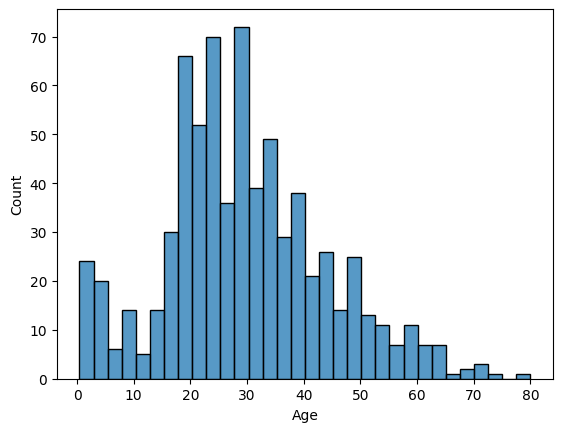

In [547]:
sns.histplot(dataset.Age, bins=32)
print("Количество человек определенного возраста")

Whole mean age: 29.69911764705882
Male mean age: 30.72664459161148
Female mean age: 27.915708812260537


<BarContainer object of 3 artists>

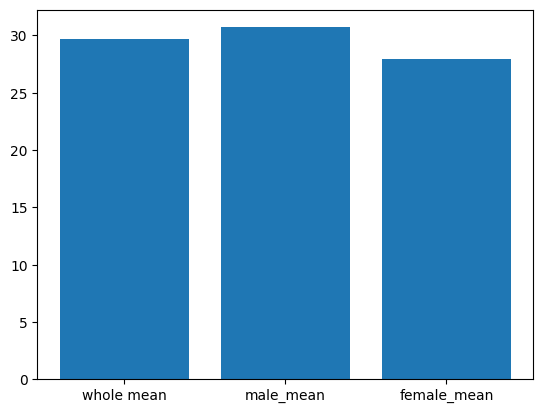

In [542]:
w_mean = dataset.Age.mean()
m_mean = dataset.Age[dataset.Sex == 'male'].mean()
f_mean = dataset.Age[dataset.Sex == 'female'].mean()

print(f"Whole mean age: {w_mean}")
print(f"Male mean age: {m_mean}")
print(f"Female mean age: {f_mean}")

plt.bar(("whole mean", "male_mean", "female_mean"), width=0.8, height = (w_mean, m_mean, f_mean))

На графиках я вижу что большинство людей на титанике были в возрасте двадцати - сорока лет

При это было весьма большое количество детей в возрасте до по сравнению в среднем со более старшими ребятами вплоть до 15

Также могу заметить, что средний возраст находящихся на судне мужчин превышал средний возраст женщин


**Task 3** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column Name, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot.

In [597]:
import re
import inspect

def titles_freq(data):
    pat = "[^ \.\s]+\.{1}"
    freq = dict()
    for d in data:
        s = re.search(pat, d)
        title = (s.string[s.regs[0][0]:s.regs[0][1]])
        if title in freq:
            freq[title] += 1
        else:
            freq[title] = 1
    return freq

There are 17 titles

 Mr.	-	517
 Mrs.	-	125
 Miss.	-	182
 Master.	-	40
 Don.	-	1
 Rev.	-	6
 Dr.	-	7
 Mme.	-	1
 Ms.	-	1
 Major.	-	2
 Lady.	-	1
 Sir.	-	1
 Mlle.	-	2
 Col.	-	2
 Capt.	-	1
 Countess.	-	1
 Jonkheer.	-	1


<BarContainer object of 17 artists>

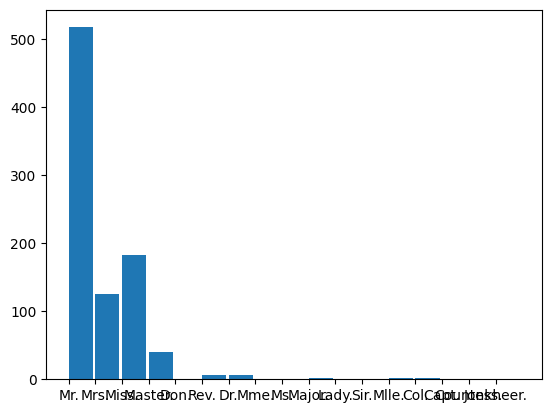

In [600]:
freq = titles_freq(dataset.Name)
print(f"There are {len(freq)} titles\n")
for f in freq:
    print(f" {f}\t-\t{freq[f]}")
    
plt.bar(list(freq.keys()), height = [freq[n] for n in freq], width=0.9, align='edge')


In [608]:
m_freq = titles_freq(dataset.Name[dataset.Sex=='male'])
f_freq = titles_freq(dataset.Name[dataset.Sex=='female'])

m_max = max(m_freq, key=m_freq.get)
f_max = max(f_freq, key=f_freq.get)

print(f"Most popular female's title is {f_max} with freq: {f_freq[f_max]}")
print(f"Most popular male's title is {m_max} with freq: {m_freq[m_max]}")

Most popular female's title is Miss. with freq: 182
Most popular male's title is Mr. with freq: 517


**Task 4** (0.5 points) <br/>
Is there correlation between *pclass* and *ticket price*? Calculate mean price for each port and visualize prize distribution for each port. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). main point here is to **choose** plots wisely and **make meaningful conclusions**



In [609]:
dataset.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Correlation between pclass and ticket price exists

Port: S. Mean ticket fare: 27.07981180124218
Port: C. Mean ticket fare: 59.95414404761905
Port: Q. Mean ticket fare: 13.276029870129872


<BarContainer object of 3 artists>

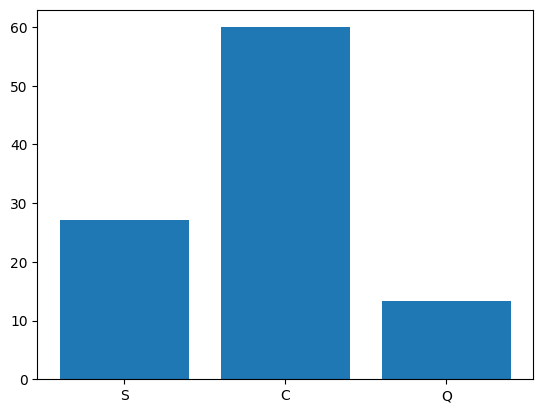

In [641]:
ports = [dataset.Embarked.dropna().unique()][0]

p_dict = dict()
for p in ports:
    p_dict[p] = dataset.Fare[dataset.Embarked==p].mean()
    print(f"Port: {p}. Mean ticket fare: {p_dict[p]}")
    
plt.bar((ports), height=[p_dict[p] for p in ports], width=0.8)

# YLabel в bar не ставиться к сожалению

Я вижу что в среднем самые дорогие билеты на титаник были в Cherbourg

На втором месте по стоимости идет Саутгемптон

И самые бюджетные продавались в Queenstown

**Task 5** (0.5 points) <br/>
The same question as in task 4 about correlation between *embarked* and *ticket priсe*.

In [644]:
dataset.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Ну в целом ожидаемо, что порт, как не числовое значение не посчитается этим методом.

Однаком на осовании предыдущего графика мы можем навязать мнение о том, что корелляция есть, поскольку разница в средней цене между городами все таки прилична и заметна

**Task 6** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Provide the same visualization for males and females separately. Make conclusions about what you see on the plots

Mean age for survived passenger: 28.343689655172415


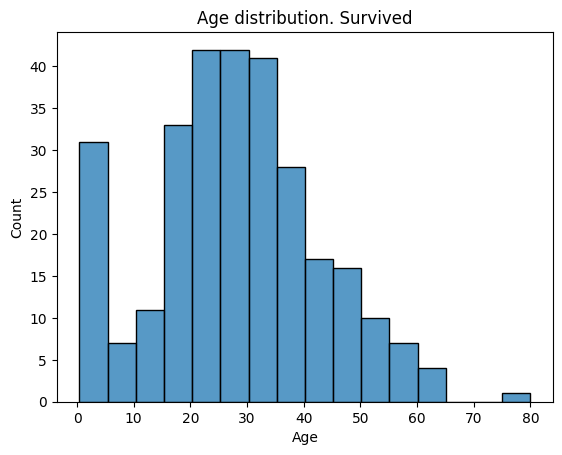

In [654]:
data = dataset.Age[dataset.Survived==1]
sns.histplot(data).set_title("Age distribution. Survived")
print(f"Mean age for survived passenger: {data.mean()}")

Mean age for non survived: 30.62617924528302


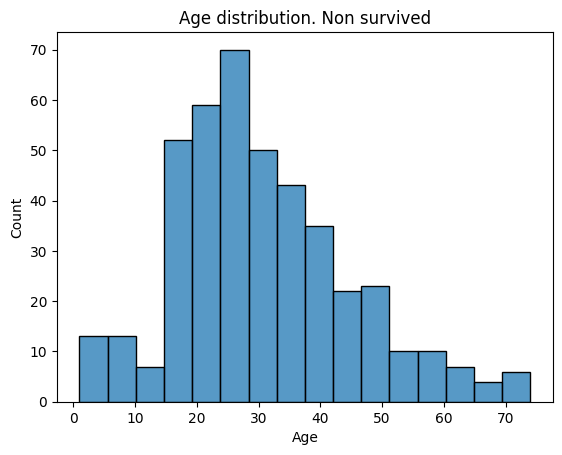

In [655]:
data = dataset.Age[dataset.Survived==0]
sns.histplot(data).set_title("Age distribution. Non survived")
print(f"Mean age for non survived: {data.mean()}")

Судя по графику, заметно, что акцент на спасение был прежде всего на детях. Более того, даже средний возраст у выживших оказался ниже, пусть и не на много.

Можно также заметить, что графики отличаются у границ возрастного диапазона, то есть в начале и в конце. Таким образом, мы можем заметить, что среди выживших пассажиров было очень мало возрастных людей 65+ и относительно много детей младшего возраста. Напротив же, на графике невыживших пассажиров  мы можем заметить, что категория лиц 65+ гораздно крупнее, 0-5 - меньше

Mean age for survived males: 27.276021505376345


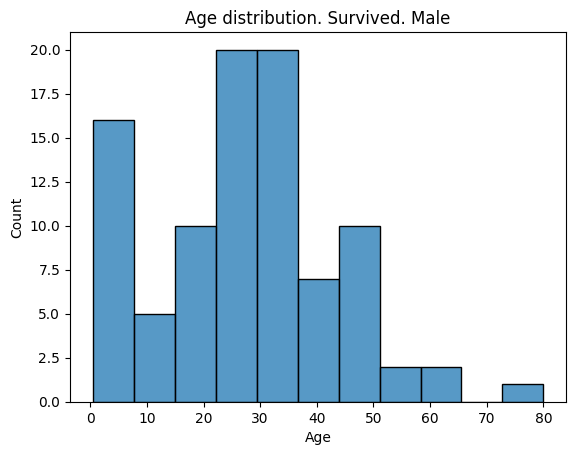

In [665]:
data = dataset.Age[dataset.Survived==1][dataset.Sex=='male']
sns.histplot(data).set_title("Age distribution. Survived. Male")
print(f"Mean age for survived males: {data.mean()}")

Mean age for survived females: 28.84771573604061


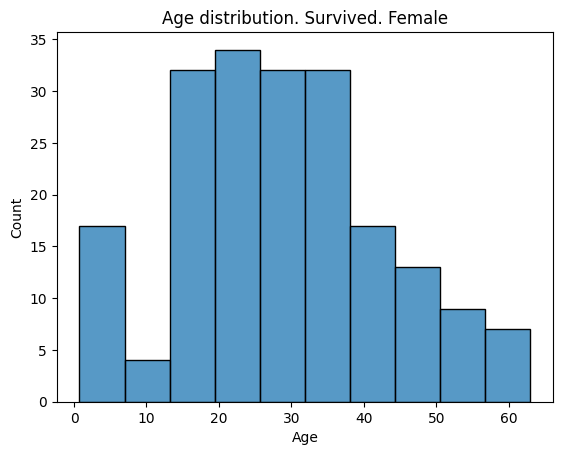

In [661]:
data = dataset.Age[dataset.Survived==1][dataset.Sex=='female']
sns.histplot(data).set_title("Age distribution. Survived. Female")
print(f"Mean age for survived females: {data.mean()}")

Mean age for nonsurvived males: 31.618055555555557


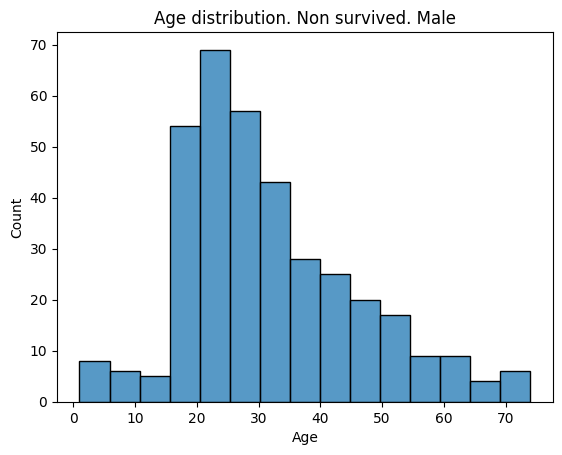

In [663]:
data = dataset.Age[dataset.Survived==0][dataset.Sex=='male']
sns.histplot(data).set_title("Age distribution. Non survived. Male")
print(f"Mean age for nonsurvived males: {data.mean()}")

Mean age for nonsurvived females: 25.046875


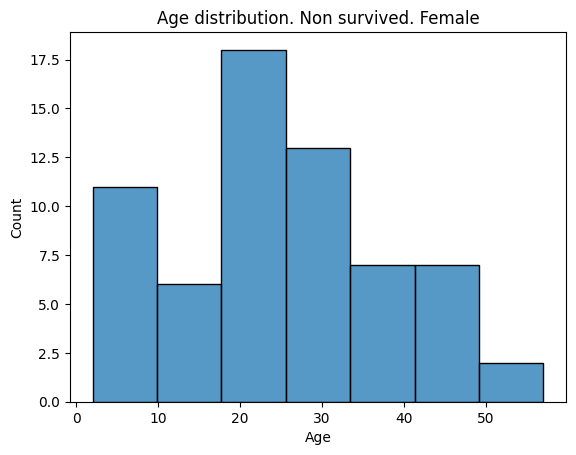

In [664]:
data = dataset.Age[dataset.Survived==0][dataset.Sex=='female']
sns.histplot(data).set_title("Age distribution. Non survived. Female")
print(f"Mean age for nonsurvived females: {data.mean()}")

Исходя из построенных гистограмм можно сделать вывод о том, распределения выживших мужчин и женщин отличаются тем, что спасшихся мужчин в возрасте 20 и 40 лет меньше, чем тех, кому было 35-35 лет, в то же время у женщин это распределение приблизительно равномерно. В остальном эти распределения схожи. 

Распределение не выживших мужчин и женщин, судя по графику, схоже

*Спасибо за проверку!!*